In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Imports and Basic Setup

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dt
import numpy as np
#torch: This is the PyTorch library, which provides functions for deep learning, tensor manipulation, etc. 

#torchvision: Contains popular datasets, model architectures, and image transformations for computer vision.

#matplotlib.pyplot: A plotting library used for visualization.

#transforms: From torchvision, helps in applying data transformations like converting images to tensors, normalizing them, augmentations, etc.

#DataLoader: A PyTorch utility that creates an iterator over datasets, handling batching, shuffling, etc.

#datasets (dt): Contains predefined datasets, including MNIST, CIFAR, and more.

#numpy: For numerical operations


# Transformations for MNIST Data

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# ToTensor(): Converts the images into PyTorch tensors (from NumPy or PIL).

# Normalize((0.5,), (0.5,)): Normalizes the pixel values to have a mean of 0.5 and a standard deviation of 0.5, 
# which scales the pixel range from [0, 1] to [-1, 1].

# Loading MNIST Dataset

In [11]:
mnist_dataset = dt.MNIST(root='./data', download=True, transform=transform)
mnist_loader = DataLoader(mnist_dataset, batch_size=25, shuffle=True)

# MNIST Dataset: The MNIST dataset of handwritten digits is downloaded and transformed using the transform defined above.

# root='./data': The directory where the dataset is stored or downloaded.

# download=True: Downloads the dataset if it’s not already available.

# transform=transform: Applies the transformations (tensor conversion and normalization).

# DataLoader: Provides batches of size 25 and shuffles the data for each epoch to ensure better generalization during training.


# Visualization Function for Original Images

In [14]:
def vis_dt(images, labels, title='Original Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i//5, i%5]
        ax.imshow(images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'Original: {labels[i].item()}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Subplots: Creates a 2x5 grid (2 rows, 5 columns) for displaying 10 images.

# images[i].squeeze(): Removes the channel dimension (since the images are grayscale, they have only one channel).

# imshow(): Displays the image with a grayscale colormap.

# labels[i].item(): Retrieves the label for the ith image.

# plt.tight_layout(): Adjusts the subplot layout for better spacing.


# Displaying Original MNIST Images

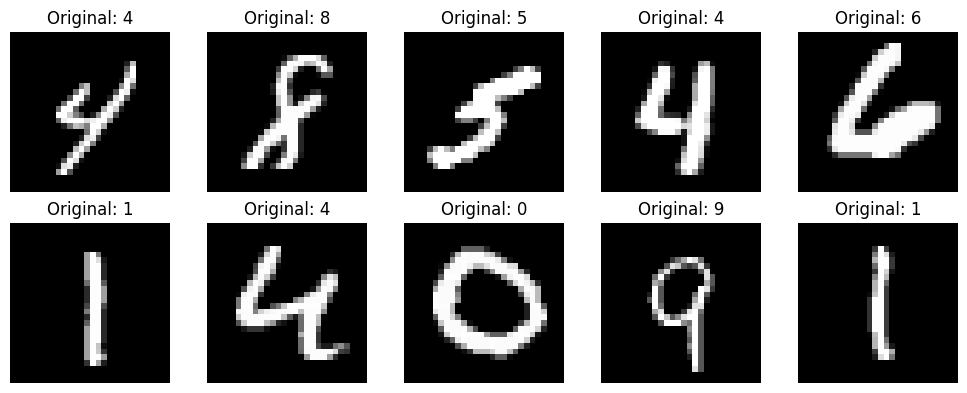

In [17]:
images, labels = next(iter(mnist_loader))
vis_dt(images, labels)

# next(iter(mnist_loader)): Fetches one batch (25 images and labels) from the DataLoader.

# vis_dt: The function is called to visualize the first 10 images and their labels from the batch.


# Data Augmentation and Preprocessing

In [20]:
transform_augment = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomErasing(scale=(1, 1), ratio=(5, 5)),
])

# RandomRotation: Randomly rotates the image by up to 30 degrees.

# RandomVerticalFlip: Randomly flips the image vertically.

# GaussianBlur: Applies a Gaussian blur with a kernel size of 5x5 and a sigma value ranging between 0.1 and 2.0.

# ToTensor: Converts the augmented images into tensors.

# Normalize: Same as before, normalizing the pixel values.

# RandomErasing: Randomly erases a part of the image, which is another form of augmentation to improve robustness.



# Loading Augmented MNIST Data

In [23]:
mnist_augment_dataset = dt.MNIST(root='./data', download=True, transform=transform_augment)
mnist_augment_loader = DataLoader(mnist_augment_dataset, batch_size=25, shuffle=True)

# This is similar to the original dataset loading but with data augmentation transformations. The augmented dataset is also loaded into a DataLoader with a batch size of 25


# Visualization Function for Augmented Images

In [26]:
def vis_dt(augmented_images, labels, title='Augmented Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i//5, i%5]
        ax.imshow(augmented_images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'Augmented: {labels[i].item()}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# This function is identical to the one for the original images, but it now visualizes the augmented images. The labels are also displayed.

# Displaying Augmented Images

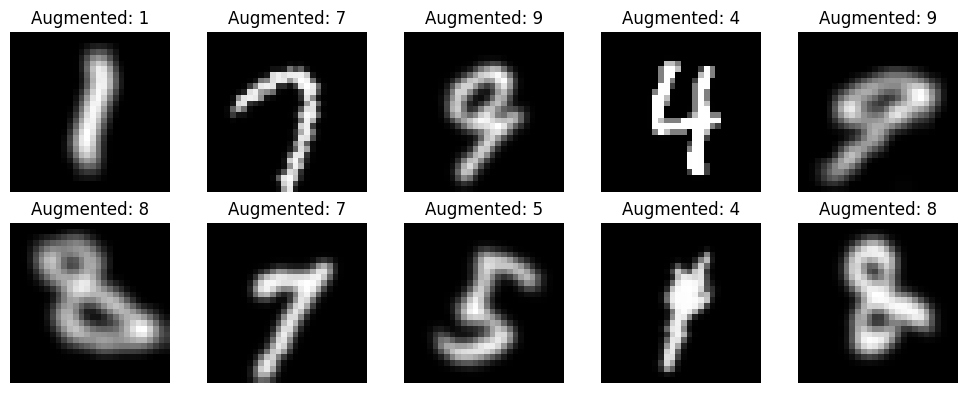

In [29]:
augmented_images, labels = next(iter(mnist_augment_loader))
vis_dt(augmented_images, labels, title='Augmented Images')

# next(iter(mnist_augment_loader)): Fetches one batch of augmented images.

# vis_dt: Displays the first 10 augmented images and their labels.